In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import statistics

%matplotlib inline

In [45]:
def generate_box_plots(runtime, parameters):
    for par in parameters:
        cpu = runtime[f'cpu_{par}']
        gpu = runtime[f'gpu_{par}']
        data = [cpu, gpu, cpu[:2], gpu[:2]]
        
        fig = plt.figure(figsize =(10, 6))
        ax = fig.add_subplot(111)
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                        notch = False, vert = 0)

        colors = ['#63B8FF', '#00C957', '#C6E2FF', '#CAFF70']

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                    linewidth = 2)

        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color ='red',
                       linewidth = 3)

        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

        # x-axis labels
        ax.set_yticklabels(['cpu', 'gpu', 'cpu_firsttwo', 'gpu_firsttwo'], fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        if par == 'infsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
        elif par == 'inference':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
        else:
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Adding title
        plt.title(par, fontsize=16)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

        # show plot
        plt.show(bp)

In [3]:
filehandler = open('NN_runtime.pkl', 'rb')
nn_runtime = pickle.load(filehandler)

In [4]:
for name, numbers in nn_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_datahandler Used 108 times
	MEDIAN 0.045736074447631836
	MEAN   0.04630029863781399
	MAX  0.06359457969665527
	MIN  0.037053585052490234
Item: cpu_netsetup Used 108 times
	MEDIAN 0.0008066892623901367
	MEAN   0.000812689463297526
	MAX  0.0008718967437744141
	MIN  0.0007770061492919922
Item: cpu_nettrain Used 108 times
	MEDIAN 6.476141929626465
	MEAN   6.4857667640403465
	MAX  6.55515193939209
	MIN  6.452430248260498
Item: cpu_infsetup Used 108 times
	MEDIAN 9.107589721679688e-05
	MEAN   9.206710038361726e-05
	MAX  0.00010943412780761719
	MIN  8.940696716308594e-05
Item: cpu_inference Used 108 times
	MEDIAN 0.001041412353515625
	MEAN   0.001042449915850604
	MAX  0.0011222362518310547
	MIN  0.001012563705444336
Item: gpu_datahandler Used 92 times
	MEDIAN 0.04652297496795654
	MEAN   0.047725571238476296
	MAX  0.16266465187072754
	MIN  0.03791475296020508
Item: gpu_netsetup Used 92 times
	MEDIAN 0.0015554428100585938
	MEAN   0.024837250294892685
	MAX  2.143388271331787
	MIN  0.00

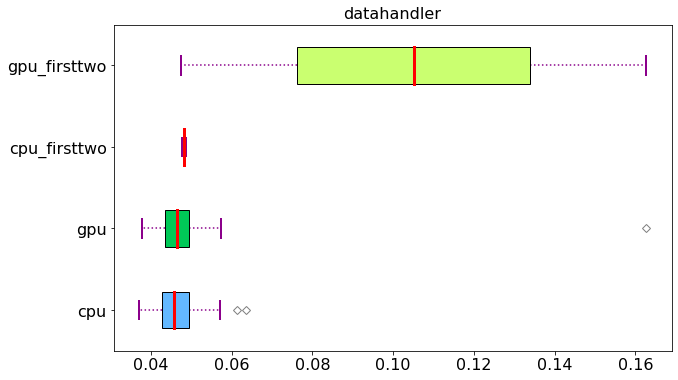

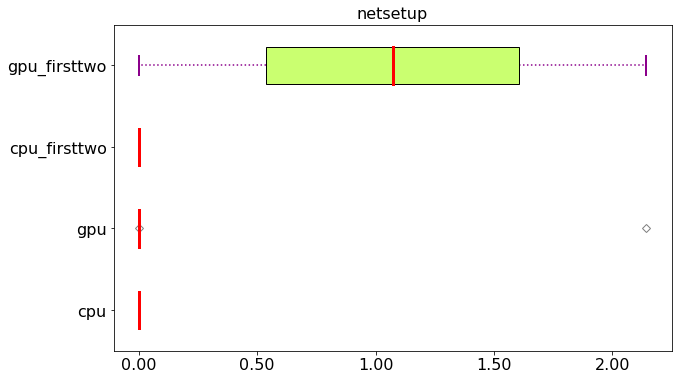

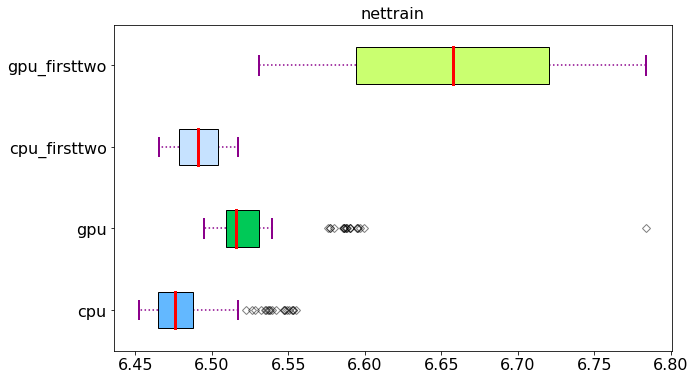

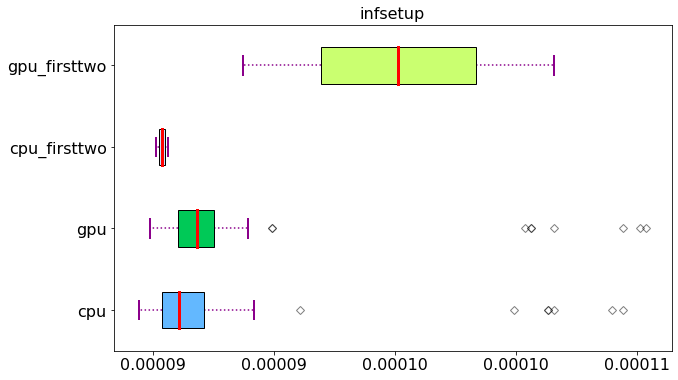

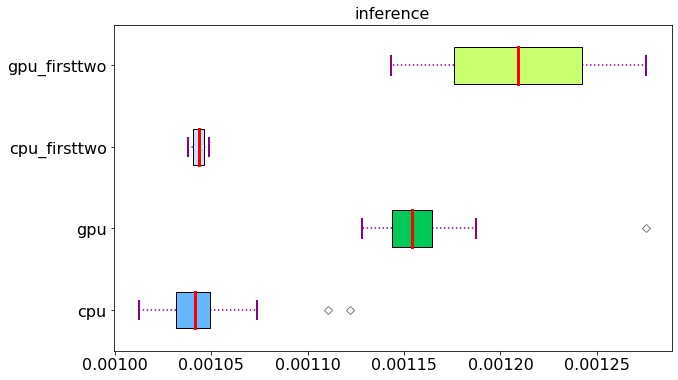

In [46]:
par = ["datahandler", "netsetup", "nettrain", "infsetup", "inference"]
generate_box_plots(nn_runtime, par)

In [6]:
filehandler = open('GP_runtime.pkl', 'rb')
gp_runtime = pickle.load(filehandler)

In [7]:
for name, numbers in gp_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_datahandler Used 108 times
	MEDIAN 0.02968442440032959
	MEAN   0.03029270304573907
	MAX  0.05510592460632324
	MIN  0.023457050323486328
Item: cpu_netsetup Used 108 times
	MEDIAN 0.0008959770202636719
	MEAN   0.0008959240383572049
	MAX  0.0009489059448242188
	MIN  0.0008707046508789062
Item: cpu_infsetup Used 108 times
	MEDIAN 0.00011372566223144531
	MEAN   0.00011469037444503219
	MAX  0.00012922286987304688
	MIN  0.00011014938354492188
Item: cpu_inference Used 108 times
	MEDIAN 1.1678117513656616
	MEAN   1.1657766699790955
	MAX  1.2801487445831299
	MIN  1.0568816661834717
Item: gpu_datahandler Used 92 times
	MEDIAN 0.02924942970275879
	MEAN   0.029454244219738503
	MAX  0.05428671836853027
	MIN  0.02299332618713379
Item: gpu_netsetup Used 92 times
	MEDIAN 0.0020836591720581055
	MEAN   0.02550108536430027
	MAX  2.15643048286438
	MIN  0.0019829273223876953
Item: gpu_infsetup Used 92 times
	MEDIAN 0.00011301040649414062
	MEAN   0.00011442796043727709
	MAX  0.0001475811004638672
	

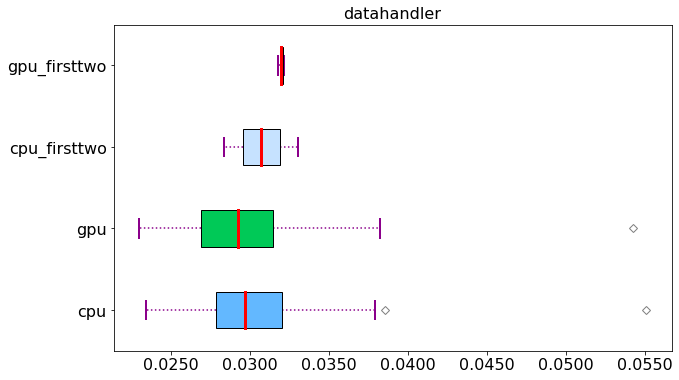

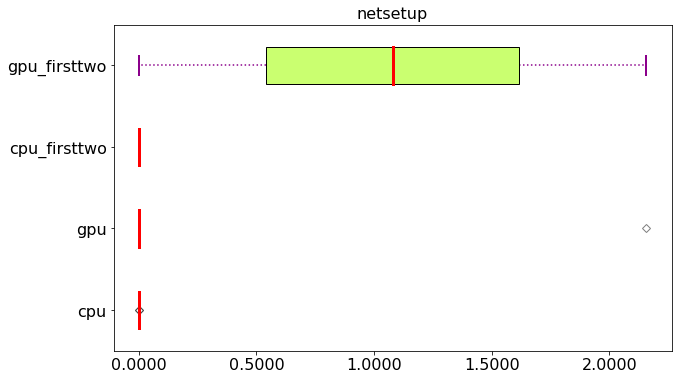

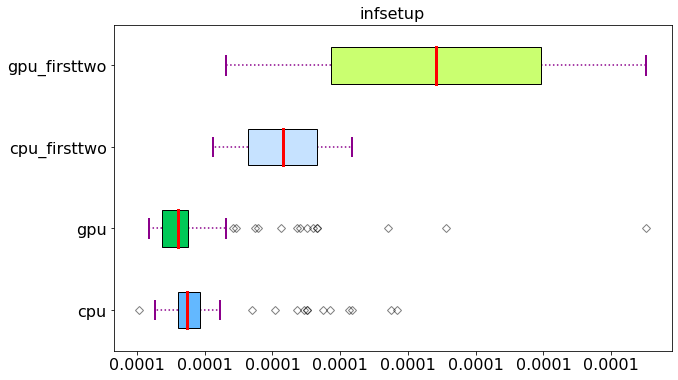

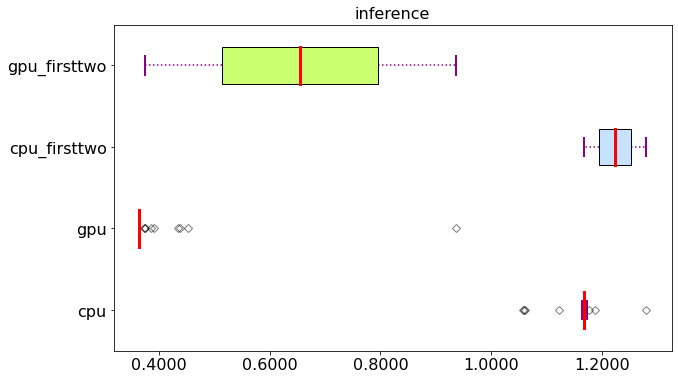

In [11]:
par = ["datahandler", "netsetup", "infsetup", "inference"]
generate_box_plots(gp_runtime, par)

In [37]:
def generate_box_plots__nn_gp(nnruntime, gpruntime, parameters):
    for par in parameters:
        if par == 'train + inference':
            cpunn = np.array(nn_runtime[f'cpu_nettrain']) + np.array(nn_runtime[f'cpu_inference'])
            gpunn = np.array(nn_runtime[f'gpu_nettrain']) + np.array(nn_runtime[f'gpu_inference'])
            cpugp = gpruntime[f'cpu_inference']
            gpugp = gpruntime[f'gpu_inference']
        else:
            cpunn = nnruntime[f'cpu_{par}']
            gpunn = nnruntime[f'gpu_{par}']
            cpugp = gpruntime[f'cpu_{par}']
            gpugp = gpruntime[f'gpu_{par}']

        data = [cpunn, gpunn, cpugp, gpugp]
        
        fig = plt.figure(figsize =(10, 6))
        ax = fig.add_subplot(111)
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                        notch = False, vert = 0)

        colors = ['#63B8FF', '#00C957', '#C6E2FF', '#CAFF70']

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                    linewidth = 2)

        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color ='red',
                       linewidth = 3)

        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

        # x-axis labels
        ax.set_yticklabels(['cpu_nn', 'gpu_nn', 'cpu_gp', 'gpu_gp'], fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        if par == 'infsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
        else:
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Adding title
        plt.title(par, fontsize=16)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

        # show plot
        plt.show(bp)

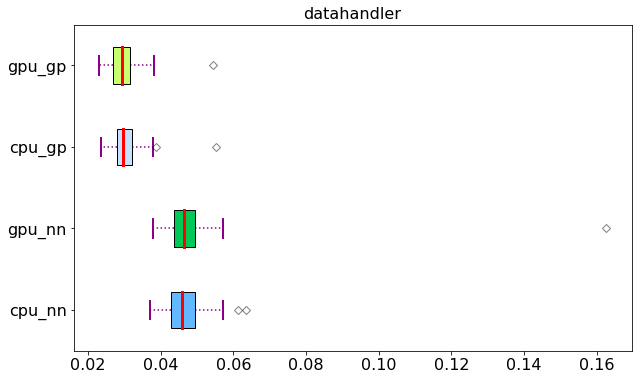

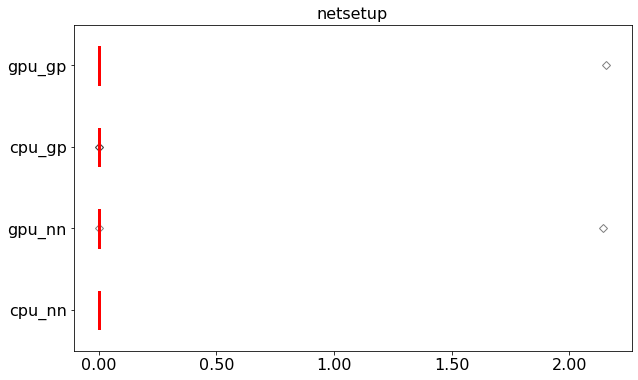

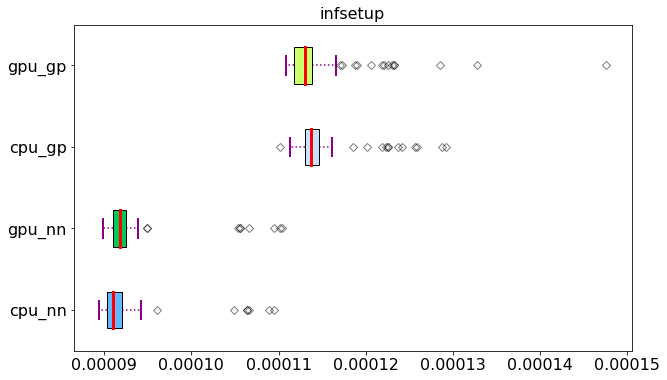

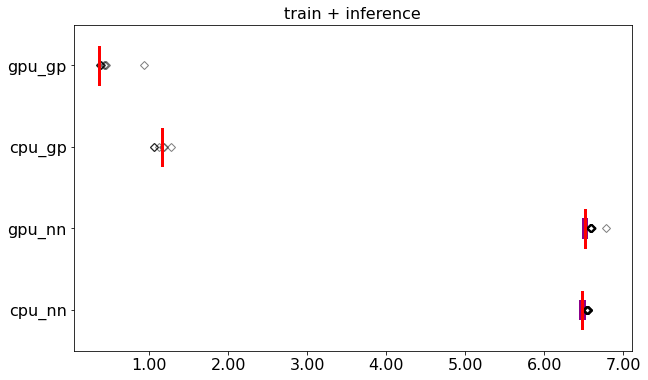

In [38]:
par = ["datahandler", "netsetup", "infsetup", "train + inference"]
generate_box_plots__nn_gp(nn_runtime, gp_runtime, par)